In [1]:
#simplified and less overfitting around 70%
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold
import os
import numpy as np
import cv2

# Assuming that data_dir is the directory where your data is stored
data_dir = '../work/training'  # replace with the path to your data

# Get the list of all the images
image_paths = []
labels = []
for class_dir in os.listdir(data_dir):
    class_dir_path = os.path.join(data_dir, class_dir)
    for image_path in os.listdir(class_dir_path):
        image_paths.append(os.path.join(class_dir_path, image_path))
        labels.append(class_dir)

# Convert labels to integers
unique_labels = np.unique(labels)
label_dict = {label: i for i, label in enumerate(unique_labels)}
labels = np.array([label_dict[label] for label in labels])

# One-hot encode labels
labels = to_categorical(labels)

# Convert one-hot encoded labels to single labels
labels_single = np.argmax(labels, axis=1)

# Perform k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True)

for train, test in kfold.split(image_paths, labels_single):
    model = Sequential()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Load and preprocess the training images
    train_images = np.array([cv2.resize(cv2.imread(path), (150, 150)) for path in np.array(image_paths)[train]])
    train_images = train_images / 255.0
    train_labels = labels[train]

    # Load and preprocess the test images
    test_images = np.array([cv2.resize(cv2.imread(path), (150, 150)) for path in np.array(image_paths)[test]])
    test_images = test_images / 255.0
    test_labels = labels[test]

    history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))
    
    score = model.evaluate(test_images, test_labels)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])





Epoch 1/25


30/30 [==============================] - 4s 74ms/step - loss: 2.0318 - accuracy: 0.2385 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/25
30/30 [==============================] - 2s 52ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/25
30/30 [==============================] - 2s 52ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/25
30/30 [==============================] - 2s 53ms/step - loss: 1.3864 - accuracy: 0.2385 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/25
30/30 [==============================] - 2s 51ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/25
30/30 [==============================] - 2s 50ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/25
30/30 [==============================] - 2s 50ms/step - loss: 1.3864 - accuracy: 0.2354 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 8/

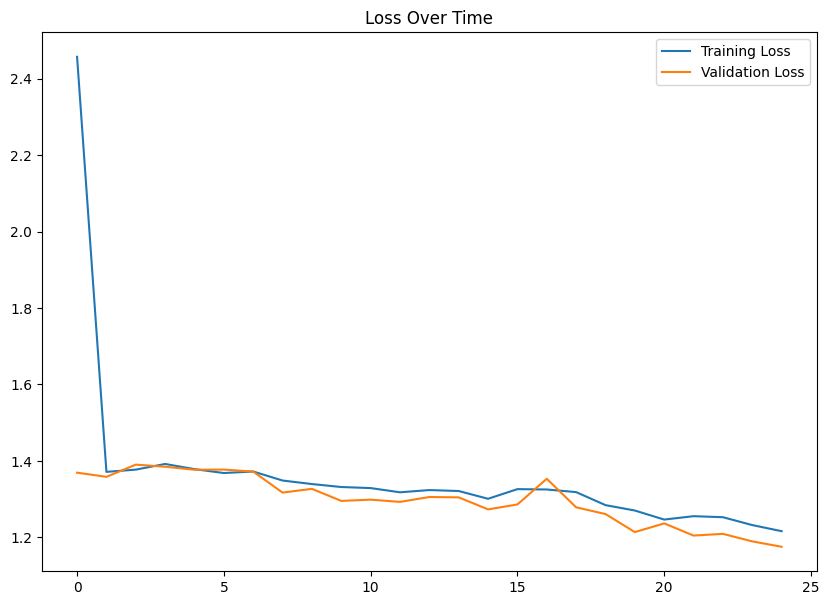

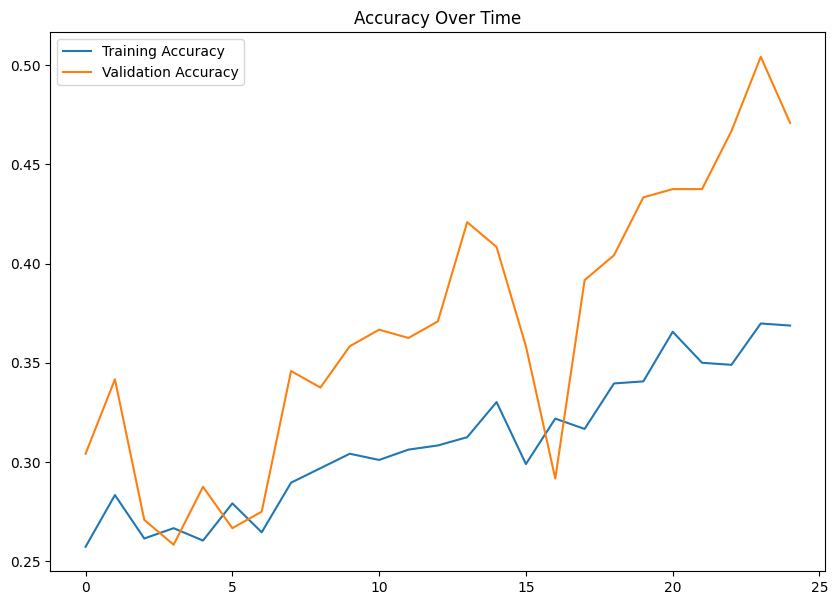

In [2]:
import matplotlib.pyplot as plt# Plot the training and validation loss and accuracy
# Fit the model and get the history
# history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

# Plot the loss
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()

# Plot the accuracy
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.show()


8/8 [==============================] - 0s 11ms/step


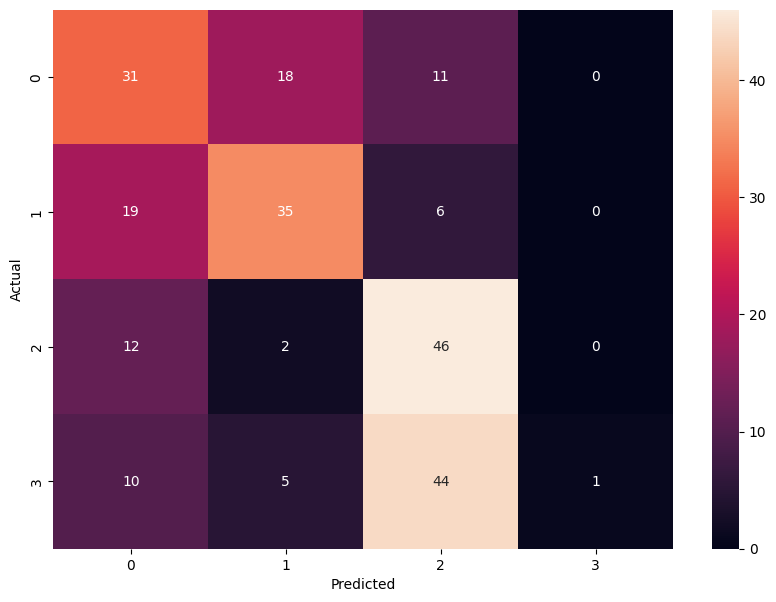

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert one-hot encoded labels to single labels
test_labels_single = np.argmax(test_labels, axis=1)

# Use the model to predict the test set
test_preds = model.predict(test_images)

# Convert the predictions to single labels
test_preds_single = np.argmax(test_preds, axis=1)

# Get the confusion matrix
cm = confusion_matrix(test_labels_single, test_preds_single)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall
precision = precision_score(test_labels_single, test_preds_single, average='weighted')
recall = recall_score(test_labels_single, test_preds_single, average='weighted')

print('Precision:', precision)
print('Recall:', recall)


Precision: 0.610948857736241
Recall: 0.4708333333333333


In [5]:
# Get the predicted probabilities for the positive class
y_score = model.predict(test_images)[:, 1]

8/8 [==============================] - 0s 11ms/step


8/8 [==============================] - 0s 12ms/step


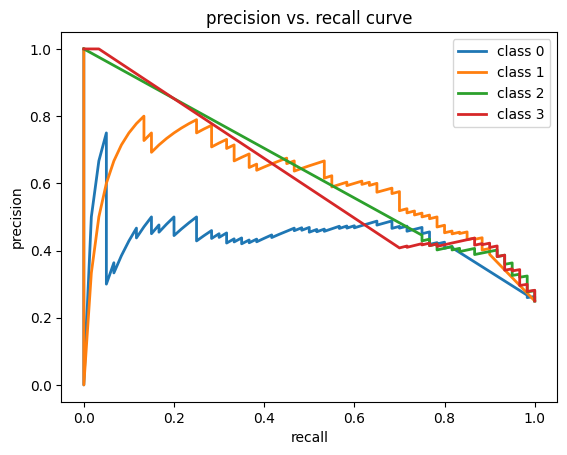

In [5]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# ... rest of your code ...

# Get the predicted probabilities for each class
y_score = model.predict(test_images)

# Compute Precision-Recall and plot curve for each class
precision = dict()
recall = dict()
for i in range(test_labels.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()


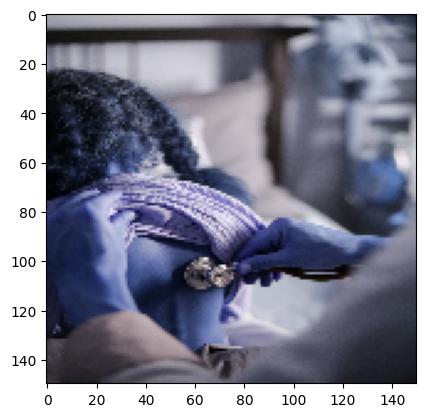

1/1 [==============================] - 0s 45ms/step
The predicted label for ../work/test4.jpg is neither.


In [6]:
import matplotlib.pyplot as plt

# Assuming that predict_image_path is the path to your image
predict_image_path = '../work/test4.jpg'  # replace with the path to your image

# Load and preprocess the image
predict_image = cv2.resize(cv2.imread(predict_image_path), (150, 150))
predict_image = predict_image / 255.0

# Display the image
plt.imshow(predict_image)
plt.show()

# Add an extra dimension for the batch size
predict_image = np.expand_dims(predict_image, axis=0)

# Predict the class
predictions = model.predict(predict_image)

# Convert prediction to label
predicted_label = np.argmax(predictions, axis=1)
predicted_label = unique_labels[predicted_label[0]]

# Print the predicted label
print(f'The predicted label for {predict_image_path} is {predicted_label}.')
